# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [14]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [15]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [16]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

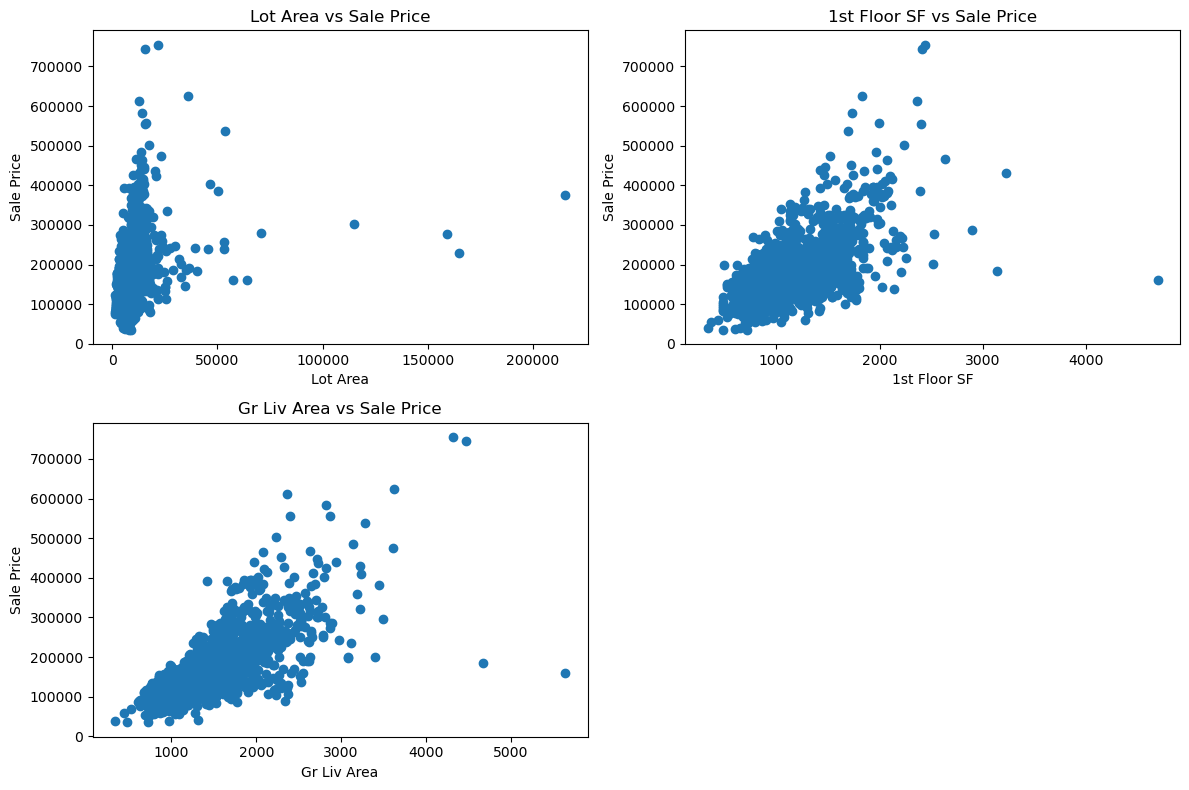

In [17]:
# Your code here - import relevant library, create scatter plots

import pandas as pd
import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')
plt.subplot(2, 2, 2)
plt.scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
plt.xlabel('1st Floor SF')
plt.ylabel('Sale Price')
plt.title('1st Floor SF vs Sale Price')
plt.subplot(2, 2, 3)
plt.scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.title('Gr Liv Area vs Sale Price')
plt.tight_layout()
plt.show()

In [18]:
# Your written answer here - do these seem like good candidates for linear regression?
# Yes, these scatter plots show a linear relationship between the features and Sale Price,

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [19]:
# Your code here - define y and baseline X
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Define target (y) and features (X)
y = ames_subset['SalePrice']
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]  # Ensure these columns exist in the dataset

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate the model on the test set
baseline_r2 = baseline_model.score(X_test, y_test)
print(f"Baseline R²: {baseline_r2}")


Baseline R²: 0.6258987939113455


In [20]:
# Your code here - import StatsModels, fit baseline model, display results
# Import necessary libraries

import statsmodels.api as sm
# Fit the baseline model using StatsModels

X_train_sm = sm.add_constant(X_train)  # Add a constant term for the intercept
baseline_model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary of the model
print(baseline_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     462.2
Date:                Sun, 27 Apr 2025   Prob (F-statistic):          1.03e-197
Time:                        00:32:57   Log-Likelihood:                -14344.
No. Observations:                1168   AIC:                         2.870e+04
Df Residuals:                    1164   BIC:                         2.872e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6261.5975   5373.530     -1.165      0.2

In [21]:
# Your written answer here - interpret model results

# The model summary provides several important statistics:
# 1. Coefficients: The coefficients for each feature indicate the expected change in Sale Price for a one-unit increase in that feature, holding all other features constant.
# 2. R-squared: This value indicates the proportion of variance in Sale Price that can be explained by the model. A higher R-squared value suggests a better fit.
# 3. P-values: These values indicate the statistical significance of each feature. A p-value less than 0.05 typically indicates that the feature is statistically significant.
# 4. Confidence intervals: These provide a range of values within which we can be reasonably sure the true coefficient lies.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [27]:
# Your code here - define X
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error  # Ensure mean_squared_error is imported
y = ames_subset['SalePrice']
X = ames_subset.drop(columns=['SalePrice'])  # Use all columns except 'SalePrice' as features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)  # Predictions for the test set
r2 = r2_score(y_test, y_pred)  # Calculate R² 
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

print(f"R² score for the multiple linear regression model: {r2}")


R² score for the multiple linear regression model: 0.6258987939113455


In [28]:
# Your code here - fit model and display results

# Display results
print(f"R² score: {r2}")
print(f"Mean Squared Error: {mse}")

R² score: 0.6258987939113455
Mean Squared Error: 2869478285.2021184


In [29]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
# The R² score indicates the proportion of variance in Sale Price that can be explained by the model.
# A higher R² score suggests a better fit. The Mean Squared Error provides an estimate of the average squared difference between the predicted and actual Sale Prices.
# If the R² score is significantly higher and the MSE is lower than the baseline model, then this model is indeed better.
#The Mean Squared Error of 2,869,478,285.20 represents the average squared difference between the actual and predicted SalePrice.
#While the MSE is harder to interpret directly without comparing to baseline results, a lower value generally indicates better model performance.


## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

Plotting partial regression for: LotArea


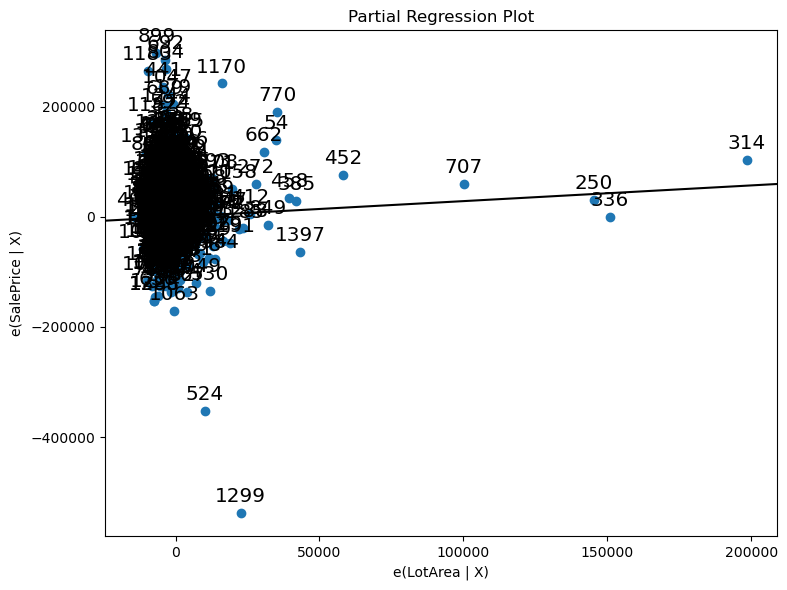

Plotting partial regression for: 1stFlrSF


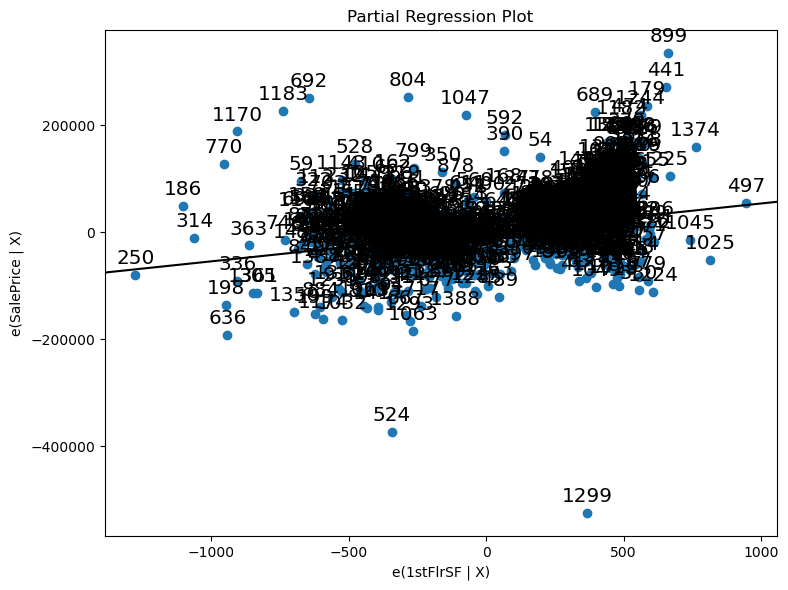

Plotting partial regression for: GrLivArea


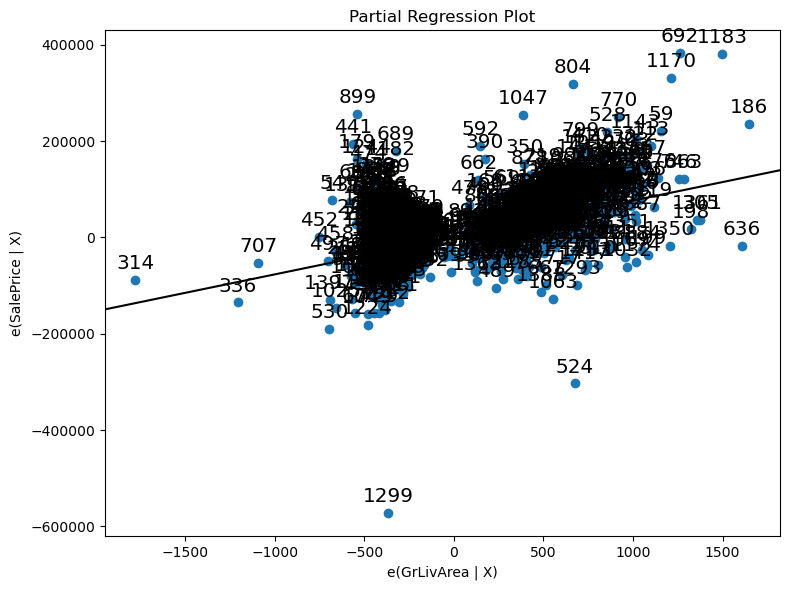

In [36]:
# Your code here - create partial regression plots for each predictor
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Assuming `ames_subset` is your dataset
X = ames_subset.drop(columns=['SalePrice'])  # Features only
y = ames_subset['SalePrice']                 # Target variable

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Drop 'const' for visualization
features = X.columns.drop('const')

# Now plot partial regression for each feature
for feature in features:
    print(f"Plotting partial regression for: {feature}")
    fig, ax = plt.subplots(figsize=(8,6))
    sm.graphics.plot_partregress(
        y,                   # 1st argument: dependent variable
        X[feature],           # 2nd argument: feature you're plotting
        X.drop(columns=[feature, 'const']),  # 3rd argument: all other features
        ax=ax
    )
    plt.tight_layout()
    plt.show()


In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [37]:
# Your code here - import linear regression from scikit-learn and create and fit model

from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
X = ames_subset.drop(columns=['SalePrice'])  # Features only
y = ames_subset['SalePrice']                 # Target variable

# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X, y)


LinearRegression()

In [38]:
# Your code here - compare R-Squared
from sklearn.metrics import r2_score
# Make predictions
y_pred = lr_model.predict(X)
# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.5649801771384368


In [39]:
# Your code here - compare intercept and coefficients
# Get intercept and coefficients
intercept = lr_model.intercept_
coefficients = lr_model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -14313.408857494447
Coefficients: [ 0.28413359 60.28664625 80.60605834]


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.